In [2]:
import time
from ising import *

rows, cols = 40, 40
k_f = 1
J0 = -1.0

##defining the lattice 
lattice = TriangularLattice(k_f, J0)
lattice.generate_lattice(40,40,0.1)


/home/lisa/Desktop/projects/pt2se/ising.py:62: RuntimeWarning: invalid value encountered in multiply
  + j1(self.kf * distances) * y1(self.kf * distances)


In [3]:
%%time
##running the simulations
T = 0.1
steps, warmup = 10000, 1000
lattice.monte_carlo_loop(steps,warmup, T)


100%|██████████| 10000/10000 [00:01<00:00, 7620.22it/s]

CPU times: user 1.38 s, sys: 10.1 ms, total: 1.39 s
Wall time: 1.38 s


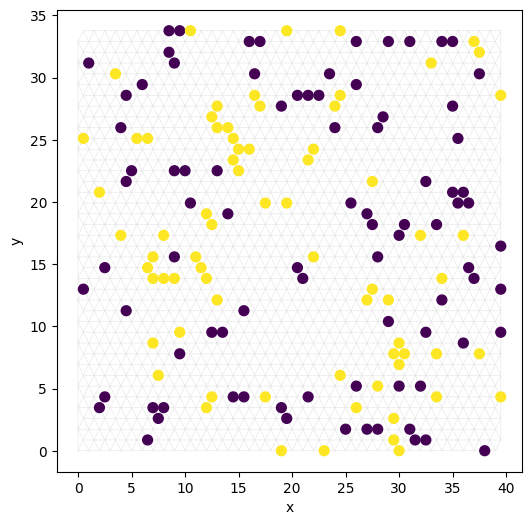

In [4]:
lattice.plot_lattice()

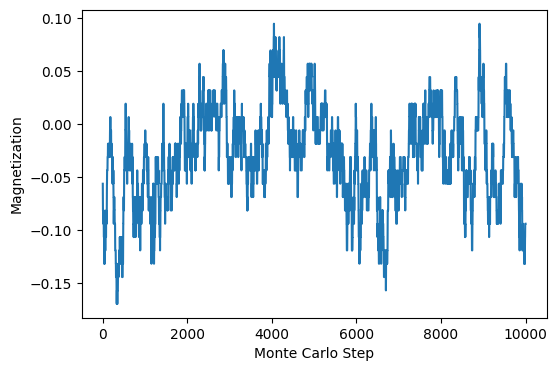

In [5]:
lattice.plot_magnetization()

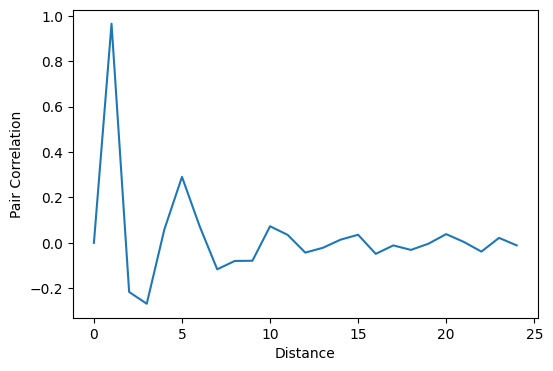

In [6]:
lattice.plot_pair_correlation()

/home/lisa/Desktop/projects/pt2se/ising.py:62: RuntimeWarning: invalid value encountered in multiply
  + j1(self.kf * distances) * y1(self.kf * distances)
100%|██████████| 10000/10000 [00:00<00:00, 18613.39it/s]


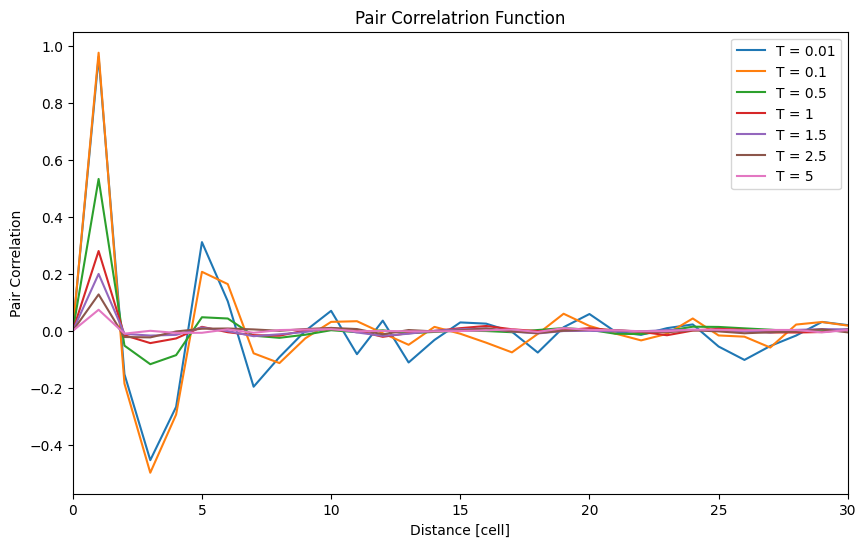

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ising import TriangularLattice

lattice = TriangularLattice(kf=1.0, J0=-1.0)
lattice.generate_lattice(rows=40, cols=40, doping=0.1)

temperatures = [0.01, 0.1, 0.5, 1, 1.5,2.5,5]

steps = 10000
warmup = 1000

results = {}

for T in temperatures:
    lattice.monte_carlo_loop(steps=steps, warmup=warmup, T=T)
    results[T] = lattice.pair_correlation

plt.figure(figsize=(10, 6))
for T, magnetization in results.items():
    plt.plot(magnetization, label=f'T = {T}')

plt.xlabel('Distance [cell]')
plt.ylabel('Pair Correlation')
plt.legend()
plt.xlim(0,30)
plt.title('Pair Correlatrion Function')
plt.show()

/home/lisa/Desktop/projects/pt2se/ising_wolff.py:62: RuntimeWarning: invalid value encountered in multiply
  + j1(self.kf * distances) * y1(self.kf * distances)
100%|██████████| 10000/10000 [00:42<00:00, 237.12it/s]


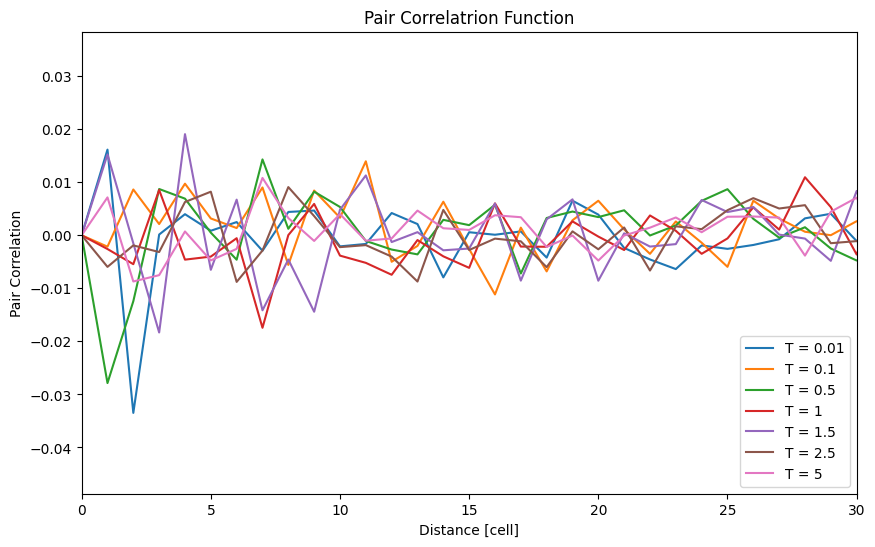

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ising_wolff import TriangularLattice

lattice = TriangularLattice(kf=1.0, J0=-1.0)
lattice.generate_lattice(rows=40, cols=40, doping=0.1)

temperatures = [0.01, 0.1, 0.5, 1, 1.5,2.5,5]

steps = 10000
warmup = 1000

results1 = {}
results2 = {}
results3 = {}

for T in temperatures:
    lattice.monte_carlo_loop(steps=steps, warmup=warmup, T=T)
    results1[T] = lattice.E
    results2[T] = lattice.M
    results3[T] = lattice.chi
    

plt.figure(figsize=(10, 6))
for T, magnetization in results.items():
    plt.plot(magnetization, label=f'T = {T}')

plt.xlabel('Distance [cell]')
plt.ylabel('Pair Correlation')
plt.legend()
plt.xlim(0,30)
plt.title('Pair Correlatrion Function')
plt.show()